IMPORTS

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, r2_score,
    accuracy_score, f1_score, precision_score, recall_score
)

LOAD TEST DATA

In [9]:
df = pd.read_csv("data/processed/TSLA_enhanced.csv", parse_dates=['Date'])
features = df.drop(columns=['next_day_change', 'Date'])
target = df['next_day_change']
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, shuffle=False, random_state=42
)

EVALUATION

In [10]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    
    metrics = {
        'MAE': mean_absolute_error(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'R2': r2_score(y_test, y_pred),
        'Accuracy': accuracy_score((y_test>0), (y_pred>0)),
        'F1': f1_score((y_test>0), (y_pred>0))
    }
    return pd.DataFrame.from_dict(metrics, orient='index', columns=['Value'])

LOAD AND EVALUATING THE MODEL

In [11]:
results = {}
model_names = ["Linear Regression", "SVM", "Random Forest", "XGBoost"]

for name in model_names:
    with open(f"models/{name.lower().replace(' ', '_')}.pkl", 'rb') as f:
        model = pickle.load(f)
    results[name] = evaluate_model(model, X_test, y_test)
    print(f"\n{name} Performance:")
    display(results[name])


Linear Regression Performance:


,Value
MAE,0.024849
RMSE,0.031207
R2,0.008576
Accuracy,0.470588
F1,0.448980



SVM Performance:


,Value
MAE,0.029498
RMSE,0.037946
R2,-0.465840
Accuracy,0.450980
F1,0.562500



Random Forest Performance:


,Value
MAE,0.014649
RMSE,0.019561
R2,0.610485
Accuracy,0.843137
F1,0.846154



XGBoost Performance:


,Value
MAE,0.004828
RMSE,0.012102
R2,0.850898
Accuracy,0.921569
F1,0.923077


VISUAL COMPARISON

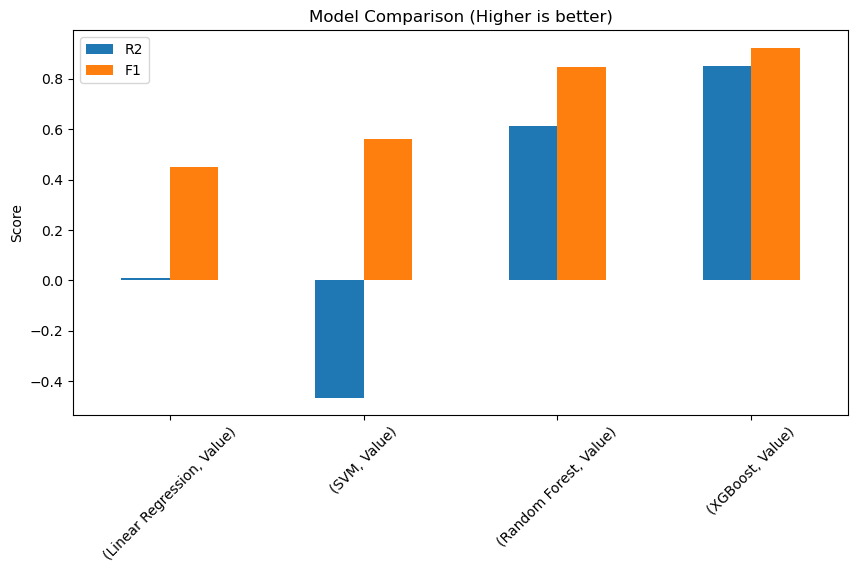

In [12]:
results_df = pd.concat(results, axis=1)
results_df.T[['R2', 'F1']].plot(kind='bar', figsize=(10,5))
plt.title('Model Comparison (Higher is better)')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()